In [42]:
import scipy as spy
from scipy.integrate import odeint
import numpy as np
from pylab import *  # for plotting commands
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=18)
matplotlib.rc('axes', labelsize=18)

# Model definition

In [43]:


Cini=0.3* 10000

Eo=0.001*23000 #/Area#

def system1(y,param):
    C = y[0]
    E = y[1]

    A =  10000 #No de hectareas del sitio de estudio 100 km2
    beta = 1 #kg/ano, Tasa de crecimiento intrinseca de la masa vegetal (1/ano)
    C0 = 200 #Kg/m2 *(kg/km2), producion de alimento por hectarea
    alpha = 14000 #Kg/(ano*ele), 124*365 cantidad de alimento consumido al año
    betaE = 1 #1/ano, 1/2 años tasa de reproduccion
    K = 0.6 #Porcentaje de hembras en la poblacion 60%
    tau = 0.3 # anos, 1.5/52 semanas Tiempo que soporta un hadrosaurus sin comer(anos)
    mu = 0.06 # 1/anos, 0.8 ? 1/15 años Tasa de mortalidad intrinseca de los hadrosaurus(1/anos)
    Ctmp = 0.14000 * 10000

    dC = beta*C*(1.0-C/(A*C0))-(3./2.)*alpha*E*C/(2*C+A*C0/2)
    dE = betaE*K*E*(1.0-(E*tau*alpha)/C)-mu*E

    return np.array([ dC, dE ])





Solving the model

[[3.00000000e+03 2.30000000e+01]
 [3.84809148e+03 4.10102845e+00]
 [5.08750680e+03 2.73786345e+00]
 ...
 [3.02775638e+05 6.48804938e+01]
 [3.02775638e+05 6.48804938e+01]
 [3.02775638e+05 6.48804938e+01]]


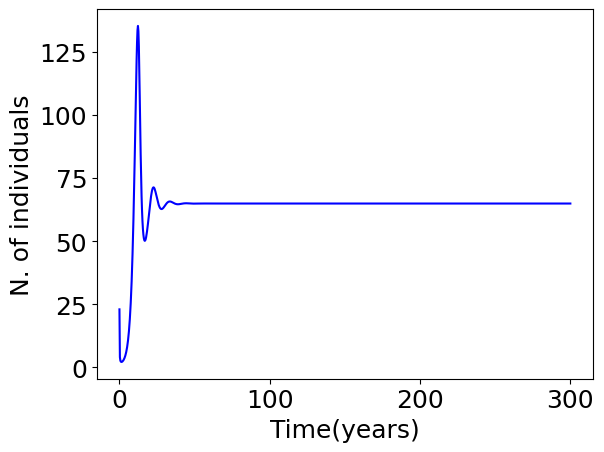

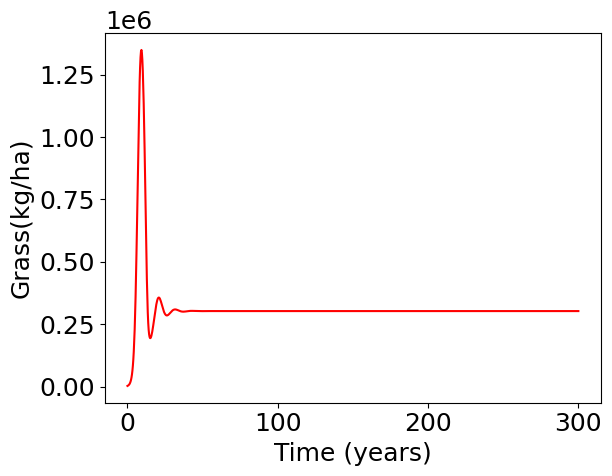

In [44]:
time = np.linspace(0.0,300,1000)

y_evol = odeint(system1,[Cini,Eo],time)



print( y_evol)



plt.xlabel('Time(years)')

plt.ylabel('N. of individuals')

plt.plot(time,y_evol[:,1],'b')

plt.show()



plt.xlabel('Time (years)')

plt.ylabel('Grass(kg/ha)')

plt.plot(time,y_evol[:,0],'r')

plt.show()

# Sensitivity analisis

Model definition

In [3]:
def system_p(y,t,param):
    C = y[0]
    E = y[1]

    A =  param[0]
    beta = param[1]
    C0 = param[2]
    alpha = param[3]
    betaE = param[4]
    K = param[5]
    tau = param[6]
    mu = param[7]

    dC = beta*C*(1.0-C/(A*C0))-(3./2.)*alpha*E*C/(2*C+A*C0/2)
    dE = betaE*K*E*(1.0-(E*tau*alpha)/C)-mu*E

    return np.array([ dC, dE ])

Parameter values

In [28]:
A =  10000 #No de hectareas del sitio de estudio 100 km2
beta = 1 #kg/ano, Tasa de crecimiento intrinseca de la masa vegetal (1/ano)
C0 = 200 #Kg/m2 *(kg/km2), producion de alimento por hectarea
alpha = 14000 #Kg/(ano*ele), 124*365 cantidad de alimento consumido al año
betaE = 1 #1/ano, 1/2 años tasa de reproduccion
K = 0.6 #Porcentaje de hembras en la poblacion 60%
tau = 0.3 # anos, 1.5/52 semanas Tiempo que soporta un hadrosaurus sin comer(anos)
mu = 0.06 # 1/anos, 0.8 ? 1/15 años Tasa de mortalidad intrinseca de los hadrosaurus(1/anos)


params = [A, beta, C0, alpha, betaE, K, tau, mu]
labels = [r'$A$', r'$\beta$', r'$C_0$', r'$\alpha$', r'$\beta_E$', r'$K$', r'$\tau$', r'$\mu$']

We altered each parameter by 10% and ran the corresponding simulation.

In [36]:
Cini=0.3* 10000
Eo=0.001*23000 #/Area#
low_values = []
high_values = []
time = np.linspace(0.0,300,1000)
y_middle = odeint(system_p,[Cini,Eo],time, args=(params,))[-1,1]

for i,  parameter in enumerate(params):
  Delta = 0.1*parameter
  param_low = params.copy()
  param_low[i] = parameter - Delta

  param_high = params.copy()
  param_high[i] = parameter + Delta


  y_low = odeint(system_p,[Cini,Eo],time, args=(param_low,))[-1,1]
  y_high = odeint(system_p,[Cini,Eo],time, args=(param_high,))[-1,1]

  low_values.append(int(y_low.round(0)))
  high_values.append(int(y_high.round(0)))


In [11]:
pip install highlight-text

Tornado plot definition (https://python-graph-gallery.com/web-tornado-chart/)

In [40]:
from highlight_text import HighlightText, ax_text, fig_text

def tornado_chart(labels, midpoint, low_values, high_values, title="<Low> VS <High> values"):
    """
    Parameters
    ----------
    labels : np.array()
        List of label titles used to identify the variables, y-axis of bar
        chart. The lengh of labels is used to itereate through to generate
        the bar charts.
    midpoint : float
        Center value for bar charts to extend from. In sensitivity analysis
        this is often the 'neutral' or 'default' model output.
    low_values : np.array()
        An np.array of the model output resulting from the low variable
        selection. Same length and order as label_range.
    high_values : np.array()
        An np.array of the model output resulting from the high variable
        selection. Same length and order as label_range.
    """

    color_low = '#537df7'
    color_high = '#f7a553'

    #ys = range(len(data['Labels']))[::1] # iterate through # of labels
    ys=range(len(labels))

    for y, low_value, high_value in zip(ys, low_values, high_values):

        low_width = midpoint - low_value
        high_width = high_value - midpoint

        plt.broken_barh(
            [
                (low_value, low_width),
                (midpoint, high_width)
            ],
            (y-0.4, 0.8), # thickness of bars and their offset
            facecolors = [color_low, color_high],
            edgecolors = ['black', 'black'],
            linewidth = 0.5
            )

        offset = 2 # offset value labels from end of bar

        if high_value > low_value:
            x_high = midpoint + high_width + offset
            x_low = midpoint - low_width - offset
        else:
            x_high = midpoint + high_width - offset
            x_low = midpoint - low_width + offset

        plt.text(x_high, y, str(high_value), va='center', ha='center')
        plt.text(x_low, y, str(low_value), va='center', ha='center')

    plt.axvline(midpoint, color='black', linewidth = 1)

    # set axis lines on or off
    ax = plt.gca()
    ax.spines[['right', 'left', 'top']].set_visible(False)
    ax.set_yticks([])

    # build legend
    ax_text(x = midpoint, y = len(labels),
            s=title,
            color='black',
            fontsize=15,
            va='center',
            ha='center',
            highlight_textprops=[{"color": color_low, "fontweight": 'bold'},
                                 {"color": color_high, "fontweight": 'bold'}],
            ax=ax)

    plt.xlabel('Population')
    plt.yticks(ys, labels)
    plt.xlim(52,78)
    plt.ylim(-0.5, len(labels)-0.5)
    plt.tick_params(left = False)
    plt.show()

    return

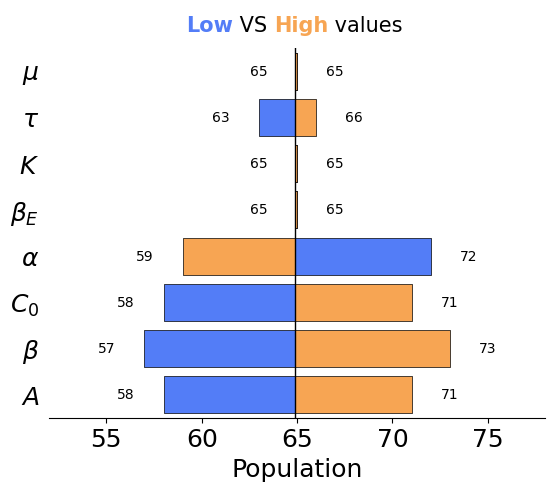

In [41]:
tornado_chart(labels, midpoint=y_middle ,low_values=low_values, high_values=high_values)